In [3]:
# !pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

  Using cached opendatasets-0.1.22-py3-none-any.whl (15 kB)
  Using cached kaggle-1.5.13.tar.gz (63 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77731 sha256=672d92d7a8062c51d190fd7dc96cc4258b612f8af784499de8361d7b48bddc4e
  Stored in directory: c:\users\mbatu\appdata\local\pip\cache\wheels\1b\22\79\e73b3e988388377c1cda3385bfa20c1799be101c2e12bbe3dc
Successfully built kaggle
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading gtsrb-german-traffic-sign.zip to .\gtsrb-german-traffic-sign


100%|██████████| 612M/612M [01:22<00:00, 7.79MB/s] 


In [ ]:
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

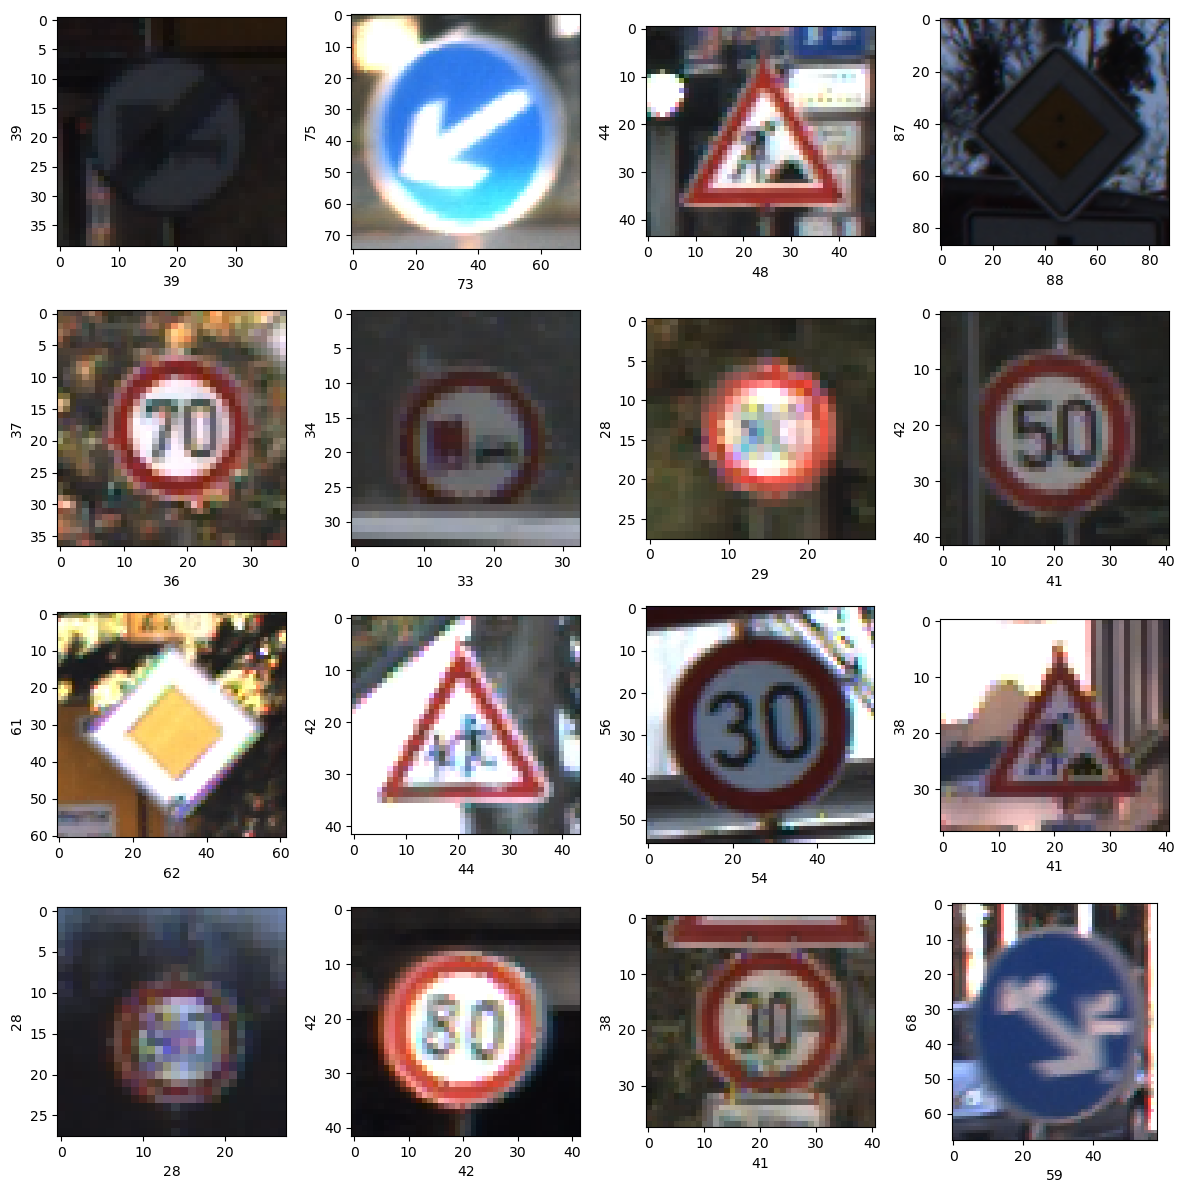

In [9]:
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range (1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +"/"+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image 

In [10]:
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + "/" + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [13]:
import numpy as np

In [14]:
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [15]:
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [16]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255 

In [17]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [18]:
images.shape

(39209, 50, 50, 3)

In [19]:
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [20]:
x_train, x_val, y_train, y_val = train_test_split(
    images, label_id , test_size = 0.2, random_state = 42)

In [21]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [22]:
model = Sequential()

model.add(Conv2D(filters = 64,
                 kernel_size=(3,3),
                 input_shape=x_train.shape[1:], 
                 activation="relu",
                 padding = "same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [24]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [26]:
model.fit(x_train, y_train,
          epochs= 10,
          batch_size=128,
          validation_data=(x_val, y_val),
          verbose=2)

Epoch 1/10
246/246 - 44s - loss: 2.5621 - accuracy: 0.3039 - val_loss: 1.2724 - val_accuracy: 0.6820 - 44s/epoch - 180ms/step
Epoch 2/10
246/246 - 43s - loss: 1.1654 - accuracy: 0.6349 - val_loss: 0.4448 - val_accuracy: 0.8986 - 43s/epoch - 177ms/step
Epoch 3/10
246/246 - 44s - loss: 0.7426 - accuracy: 0.7618 - val_loss: 0.2834 - val_accuracy: 0.9519 - 44s/epoch - 179ms/step
Epoch 4/10
246/246 - 42s - loss: 0.5789 - accuracy: 0.8127 - val_loss: 0.2049 - val_accuracy: 0.9623 - 42s/epoch - 171ms/step
Epoch 5/10
246/246 - 43s - loss: 0.4799 - accuracy: 0.8434 - val_loss: 0.1381 - val_accuracy: 0.9745 - 43s/epoch - 176ms/step
Epoch 6/10
246/246 - 43s - loss: 0.4268 - accuracy: 0.8608 - val_loss: 0.1167 - val_accuracy: 0.9744 - 43s/epoch - 176ms/step
Epoch 7/10
246/246 - 42s - loss: 0.3807 - accuracy: 0.8766 - val_loss: 0.0941 - val_accuracy: 0.9782 - 42s/epoch - 172ms/step
Epoch 8/10
246/246 - 43s - loss: 0.3430 - accuracy: 0.8879 - val_loss: 0.0854 - val_accuracy: 0.9828 - 43s/epoch - 175

<Axes: >

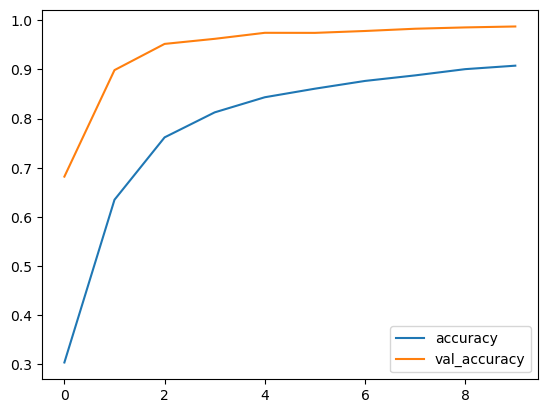

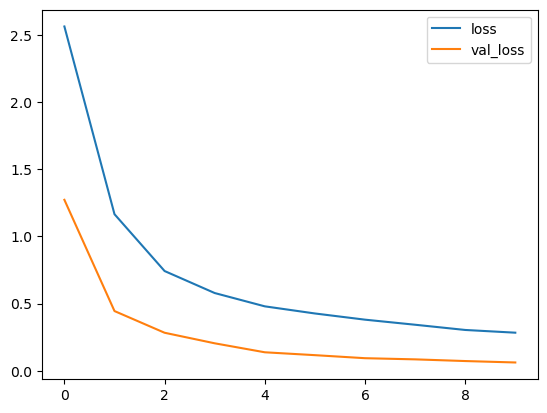

In [27]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [28]:
test_path = 'traffic_sign_dataset/Test'

In [29]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [41]:
os.remove("traffic_sign_dataset/Test/GT-final_test.csv")

In [42]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [43]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [79]:
y_pred = np.argmax(model.predict(test_images), axis=-1)
y_pred

395/395 [==============================] - 5s 13ms/step


array([16,  1, 38, ..., 38,  7, 10], dtype=int64)

In [80]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

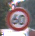

In [81]:
# Visualize test image
img = Image.open(test_path + '/00763.png')
img

In [82]:
print("Original label : ",all_lables[y_test[763]])
print("Predicted label : ",all_lables[y_pred[763]])

Original label :  Speed limit (60km/h)
Predicted label :  Speed limit (60km/h)


In [84]:
model.save("cute_traffic_monster")

INFO:tensorflow:Assets written to: cute_traffic_monster\assets


INFO:tensorflow:Assets written to: cute_traffic_monster\assets
